In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('AirbnbData_cleaned.csv')

In [5]:
df.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,48150,5065,MAUKA BB,7257,Wayne,Hawaii,Hamakua,20.04095,-155.43251,Entire home/apt,85,2,42,2020-03-22,0.45,2,365,Hawaii
1,48151,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,Hawaii,South Kohala,20.02740,-155.70200,Entire home/apt,124,30,10,2020-01-03,0.09,5,261,Hawaii
2,48152,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,South Kona,19.43119,-155.88079,Entire home/apt,85,5,168,2020-03-18,1.30,3,242,Hawaii
3,48153,5389,Keauhou Villa,7878,Edward,Hawaii,North Kona,19.56413,-155.96347,Entire home/apt,239,6,20,2020-03-22,0.24,3,287,Hawaii
4,48154,5390,STAY AT PRINCE KUHIO!,7887,Todd,Kauai,Koloa-Poipu,21.88305,-159.47372,Entire home/apt,92,3,143,2020-10-08,1.03,1,116,Hawaii


In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,5065,MAUKA BB,7257,Wayne,Hawaii,Hamakua,20.04095,-155.43251,Entire home/apt,85,2,42,2020-03-22,0.45,2,365,Hawaii
1,5269,Upcountry Hospitality in the 'Auwai Suite,7620,Lea & Pat,Hawaii,South Kohala,20.02740,-155.70200,Entire home/apt,124,30,10,2020-01-03,0.09,5,261,Hawaii
2,5387,Hale Koa Studio & 1 Bedroom Units!!,7878,Edward,Hawaii,South Kona,19.43119,-155.88079,Entire home/apt,85,5,168,2020-03-18,1.30,3,242,Hawaii
3,5389,Keauhou Villa,7878,Edward,Hawaii,North Kona,19.56413,-155.96347,Entire home/apt,239,6,20,2020-03-22,0.24,3,287,Hawaii
4,5390,STAY AT PRINCE KUHIO!,7887,Todd,Kauai,Koloa-Poipu,21.88305,-159.47372,Entire home/apt,92,3,143,2020-10-08,1.03,1,116,Hawaii


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85144 entries, 0 to 85143
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              85144 non-null  int64  
 1   name                            85144 non-null  object 
 2   host_id                         85144 non-null  int64  
 3   host_name                       85144 non-null  object 
 4   neighbourhood_group             85144 non-null  object 
 5   neighbourhood                   85144 non-null  object 
 6   latitude                        85144 non-null  float64
 7   longitude                       85144 non-null  float64
 8   room_type                       85144 non-null  object 
 9   price                           85144 non-null  int64  
 10  minimum_nights                  85144 non-null  int64  
 11  number_of_reviews               85144 non-null  int64  
 12  last_review                     

In [9]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'city'],
      dtype='object')

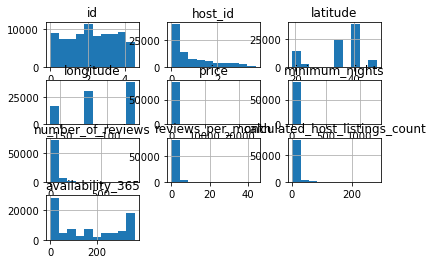

In [10]:
df.hist(df.columns)
plt.show()

<AxesSubplot:xlabel='city', ylabel='price'>

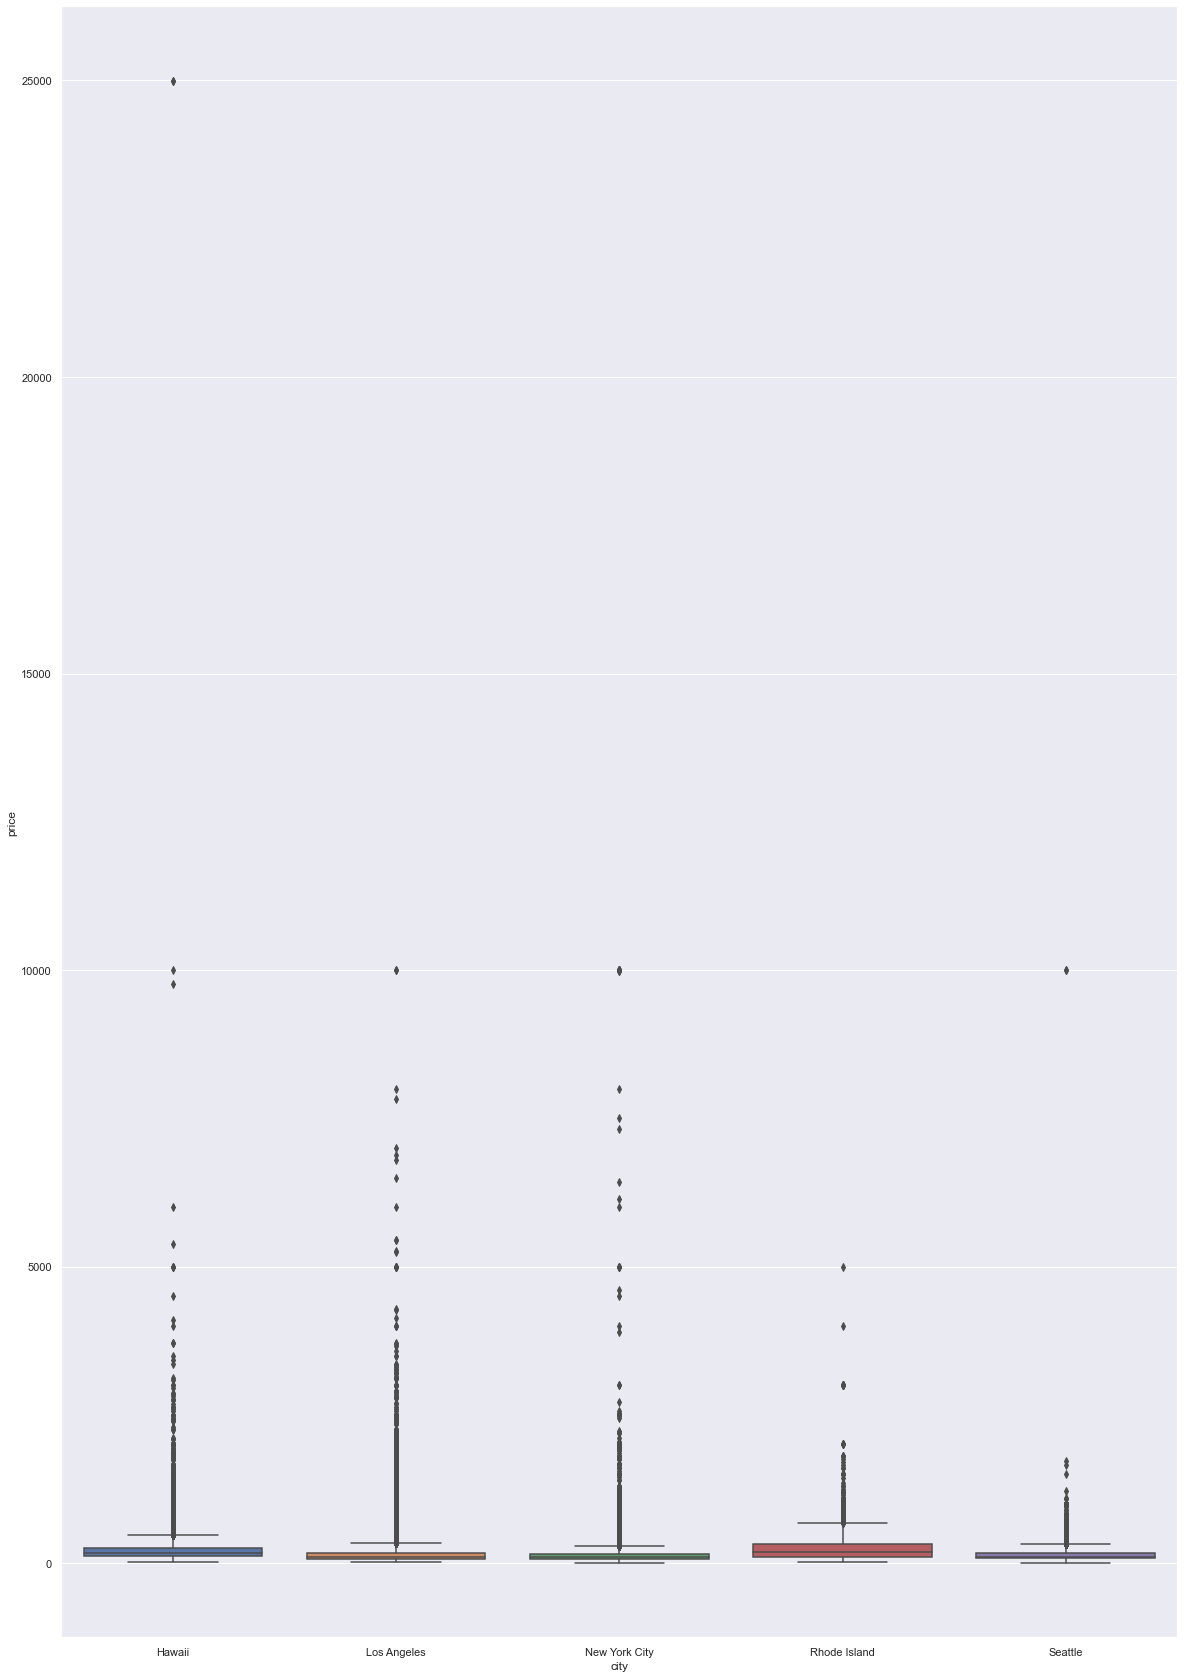

In [11]:
sns.set(rc={'figure.figsize':(20,30)})
sns.boxplot(data = df, x='city', y='price')


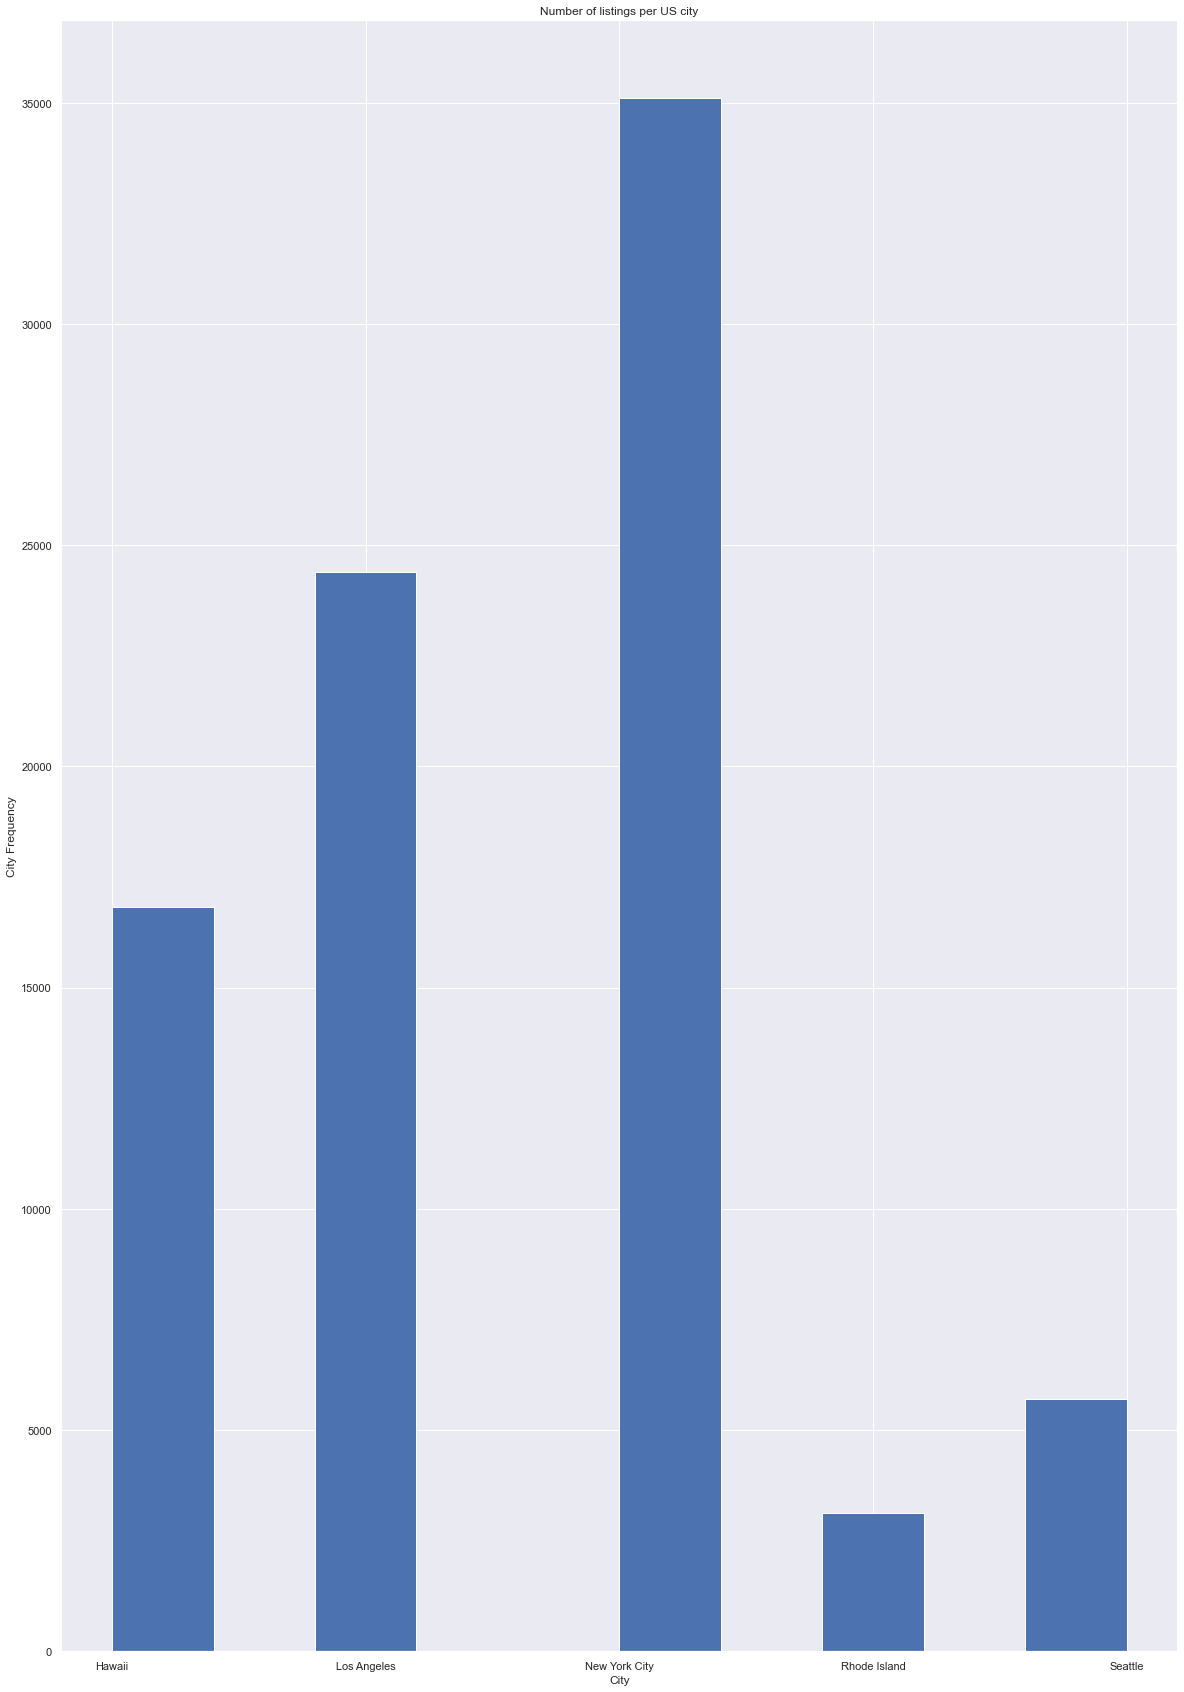

In [12]:
plt.hist(data=df, x='city')
plt.ylabel('City Frequency')
plt.xlabel('City')
plt.title('Number of listings per US city')
plt.show()

<AxesSubplot:xlabel='room_type', ylabel='price'>

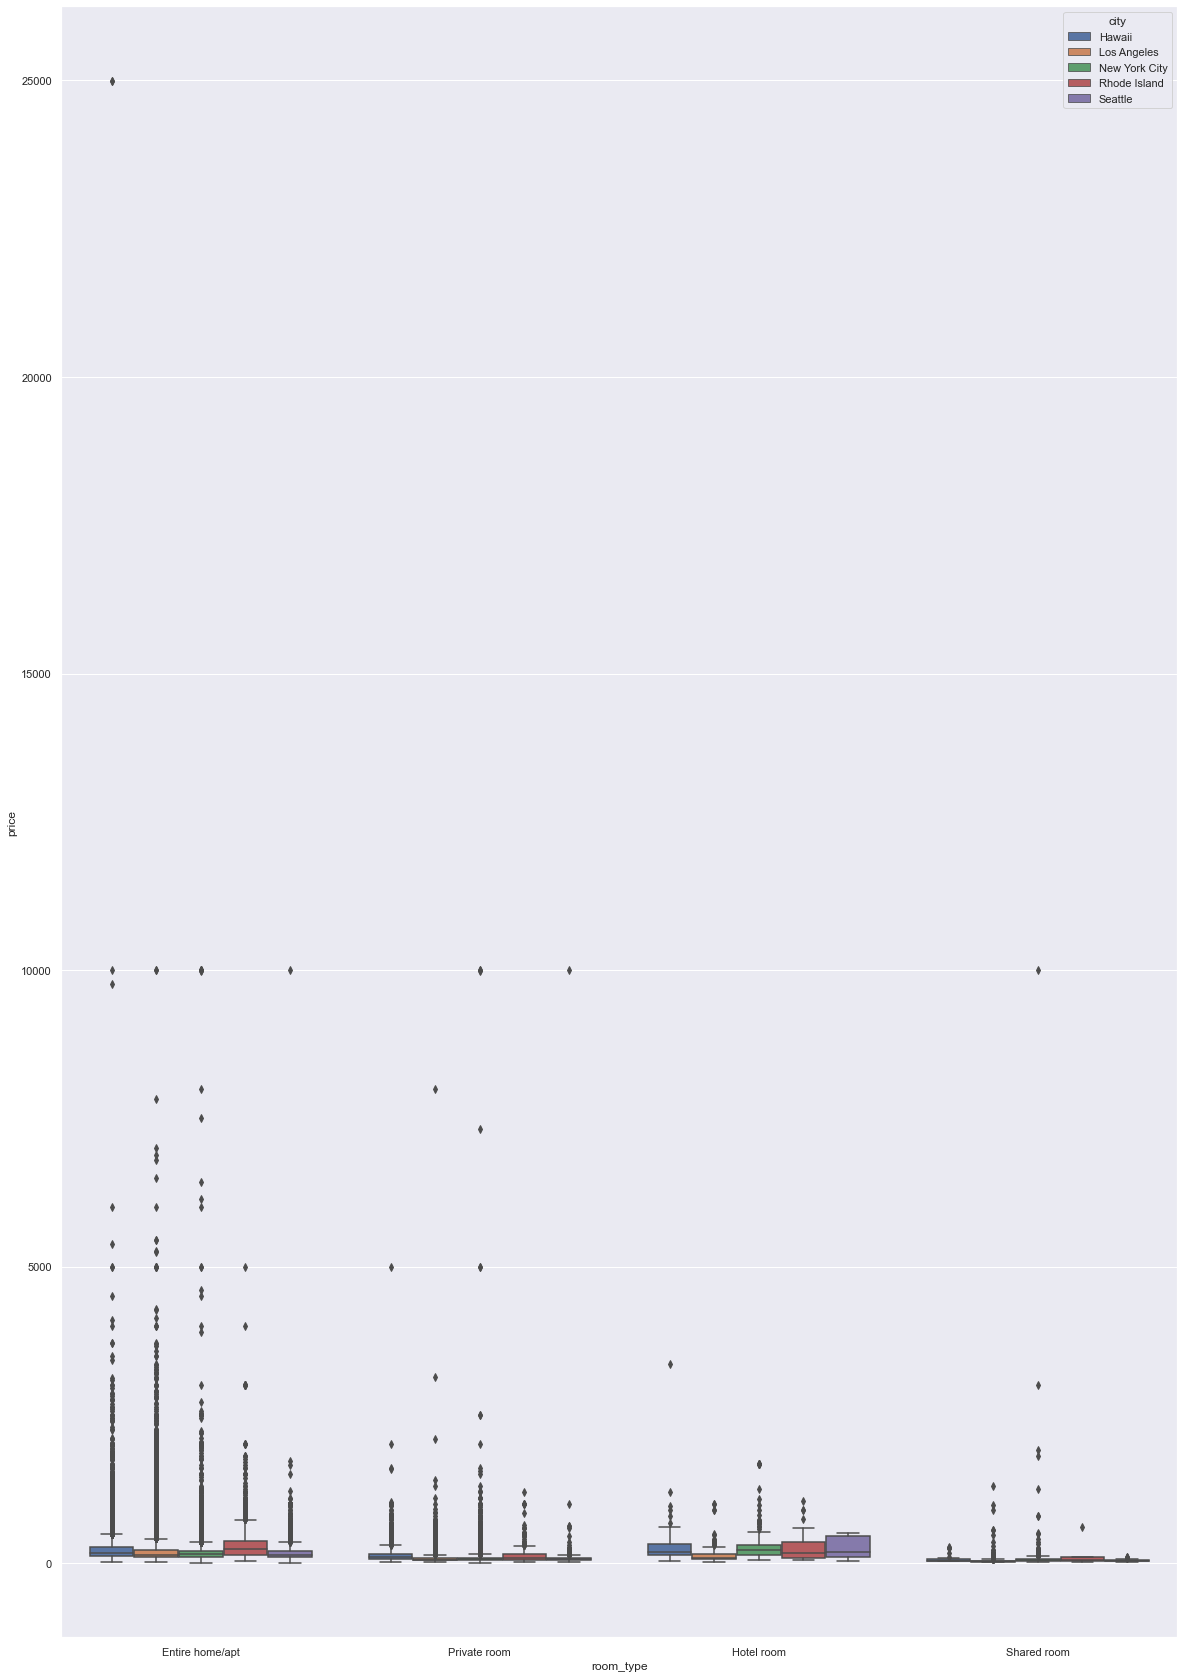

In [13]:
sns.boxplot(data=df, x='room_type', y='price', hue='city')

In [14]:
correlation = df.corr()

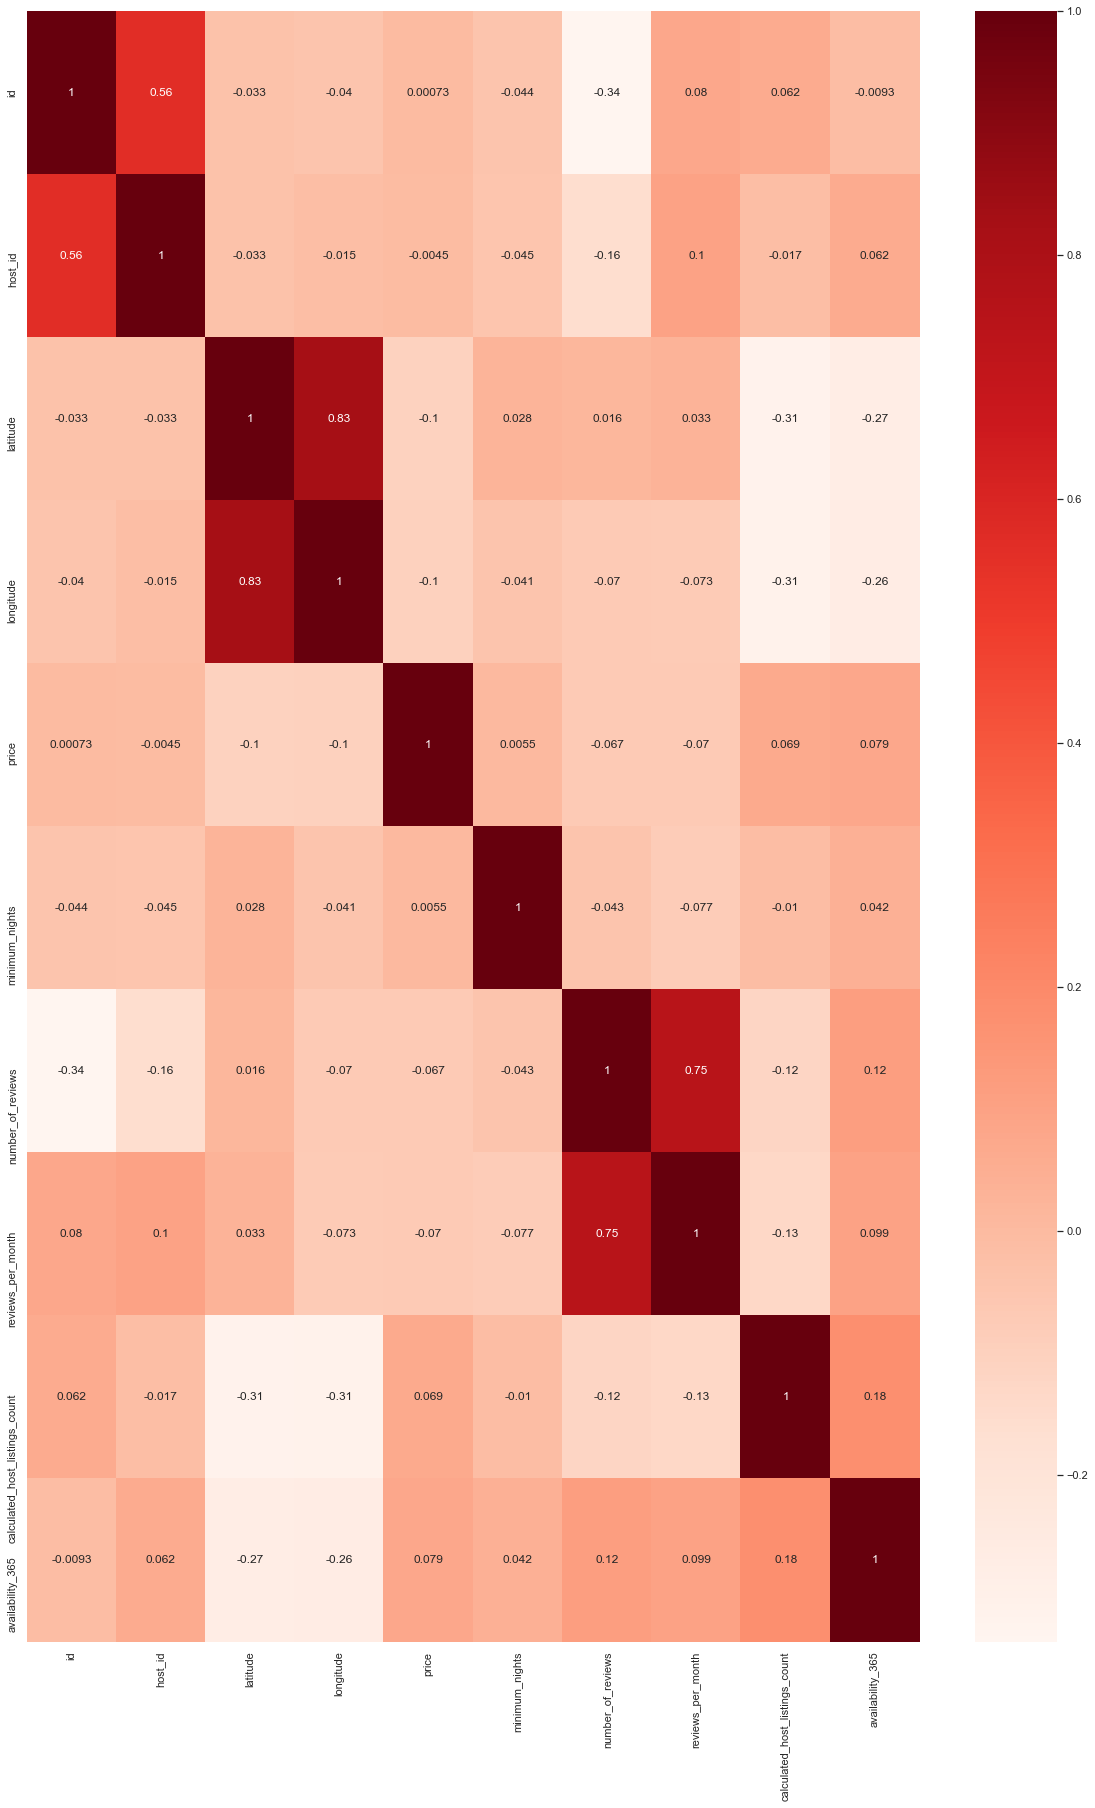

In [15]:
sns.heatmap(correlation, annot=True, cmap=plt.cm.Reds)
plt.show()

In [16]:
cor_target = abs(correlation['price'])
relevant_features = cor_target[cor_target>0.5]
relevant_features

price    1.0
Name: price, dtype: float64

C:\Users\malak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


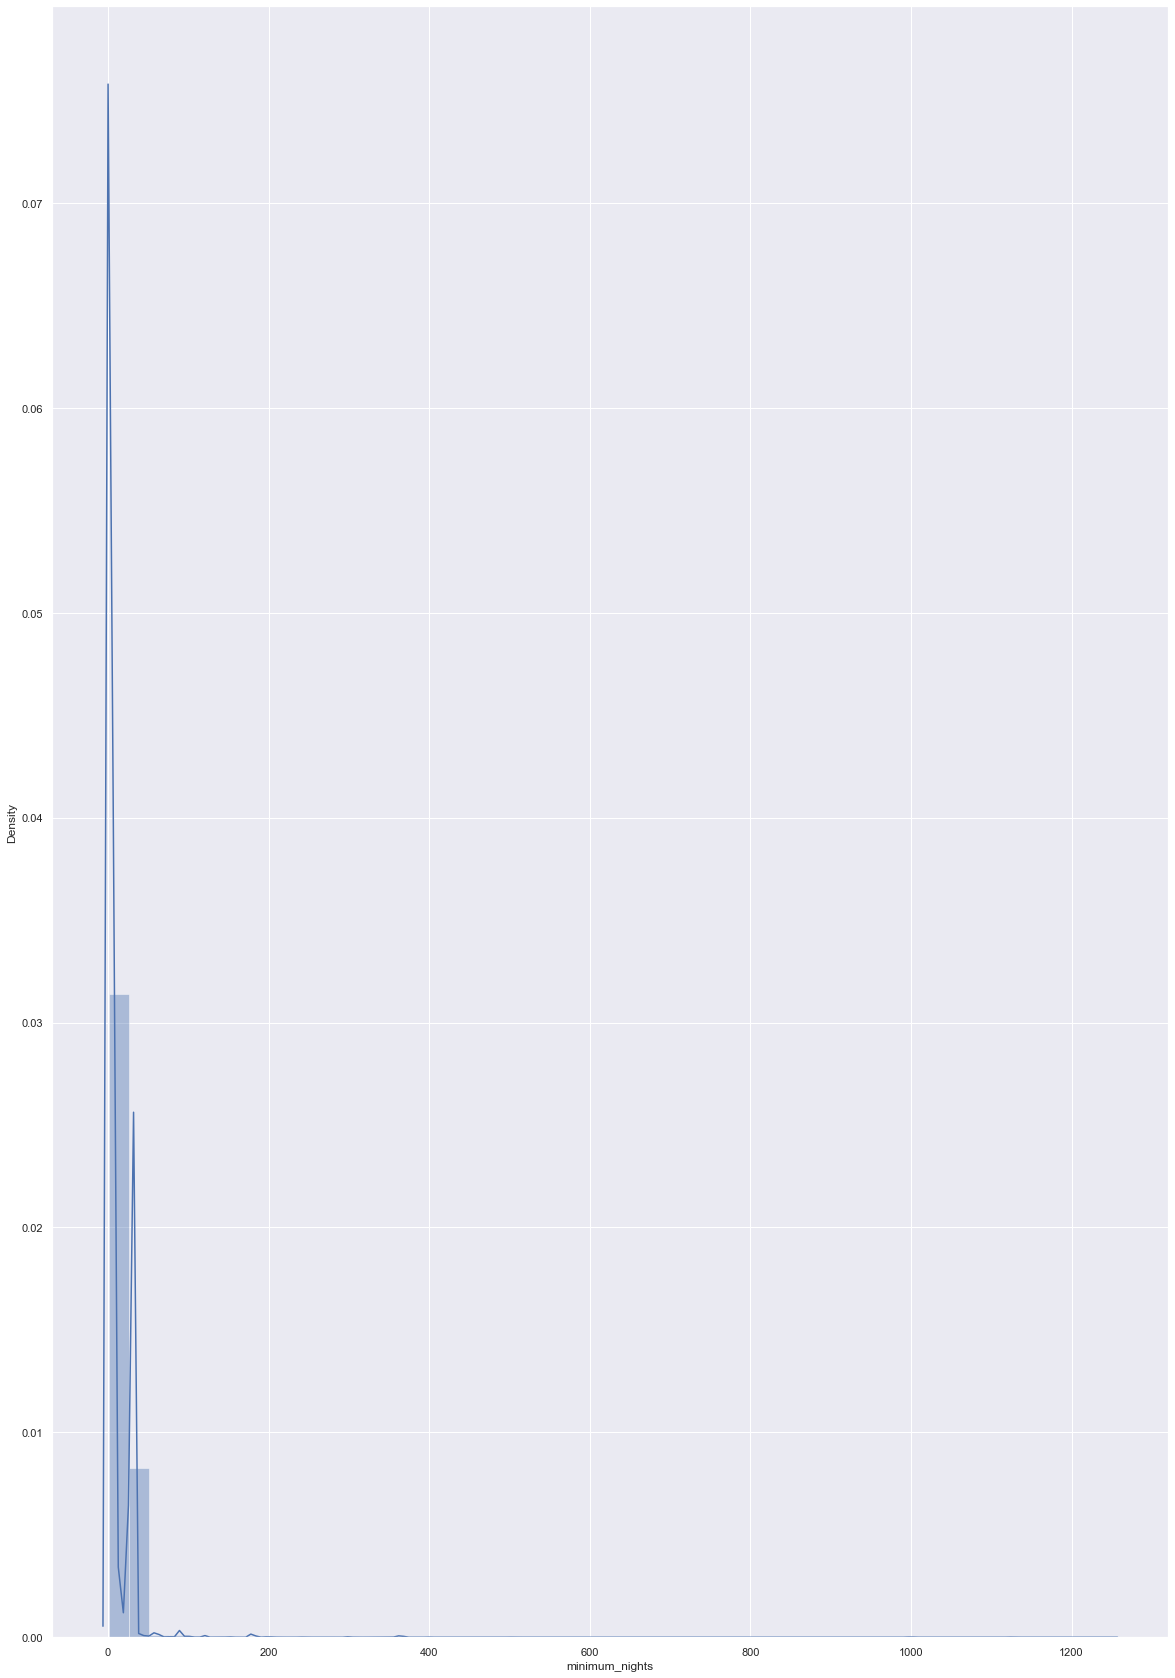

In [17]:
sns.distplot(df['minimum_nights'])
plt.show()

In [18]:
upper_limit = df['minimum_nights'].mean() + 3*df['minimum_nights'].std()
upper_limit

80.65496992610488

In [19]:
df_new = df[df['minimum_nights'] < upper_limit]
df_new.shape

(84595, 17)

C:\Users\malak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


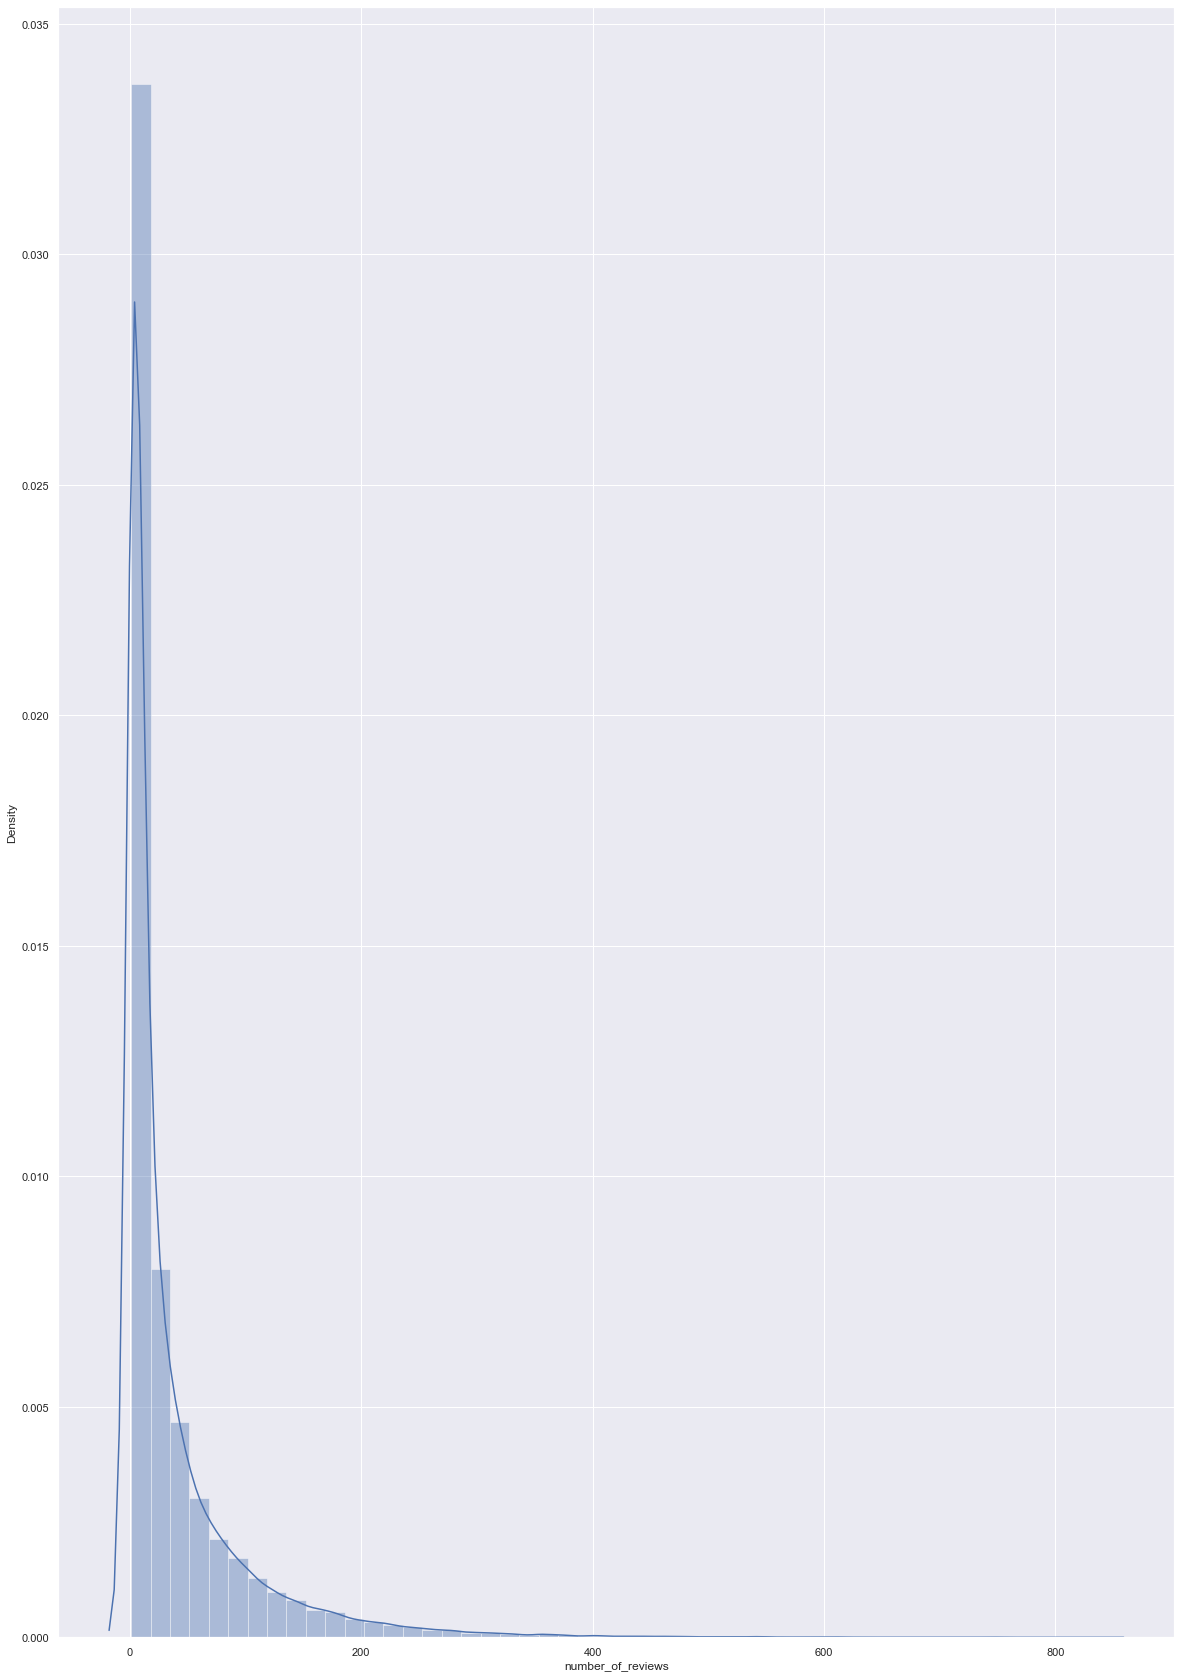

In [20]:
sns.distplot(df['number_of_reviews'])
plt.show()

C:\Users\malak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_of_reviews'>

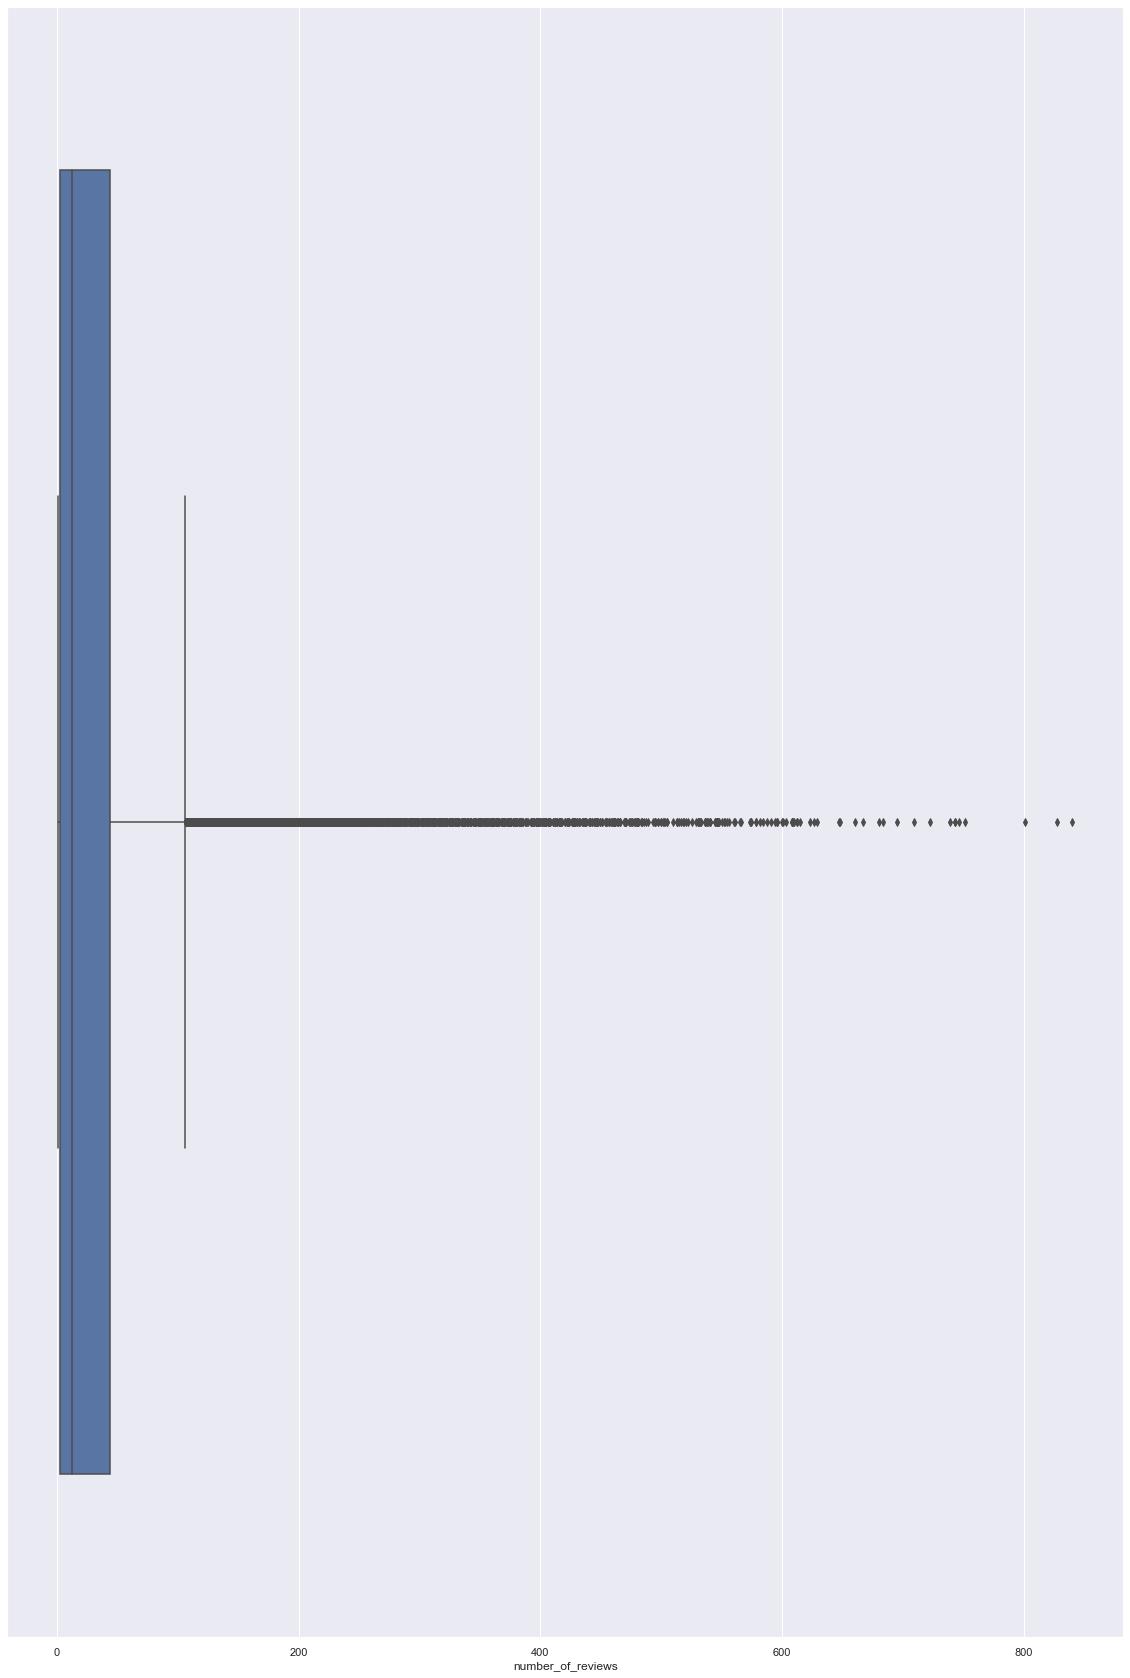

In [21]:
sns.boxplot(df['number_of_reviews'])

In [22]:
q25 = df['number_of_reviews'].quantile(0.25)
q75 = df['number_of_reviews'].quantile(0.75)
q25, q75

(3.0, 44.25)

In [23]:
iqr = q75 - q25
iqr

41.25

In [24]:
upper = q75 + 1.5 * iqr
lower = q25 - 1.5 * iqr
lower, upper

(-58.875, 106.125)

In [25]:
new_df = df_new[df_new['number_of_reviews'] < upper]
new_df.shape

(76122, 17)

C:\Users\malak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


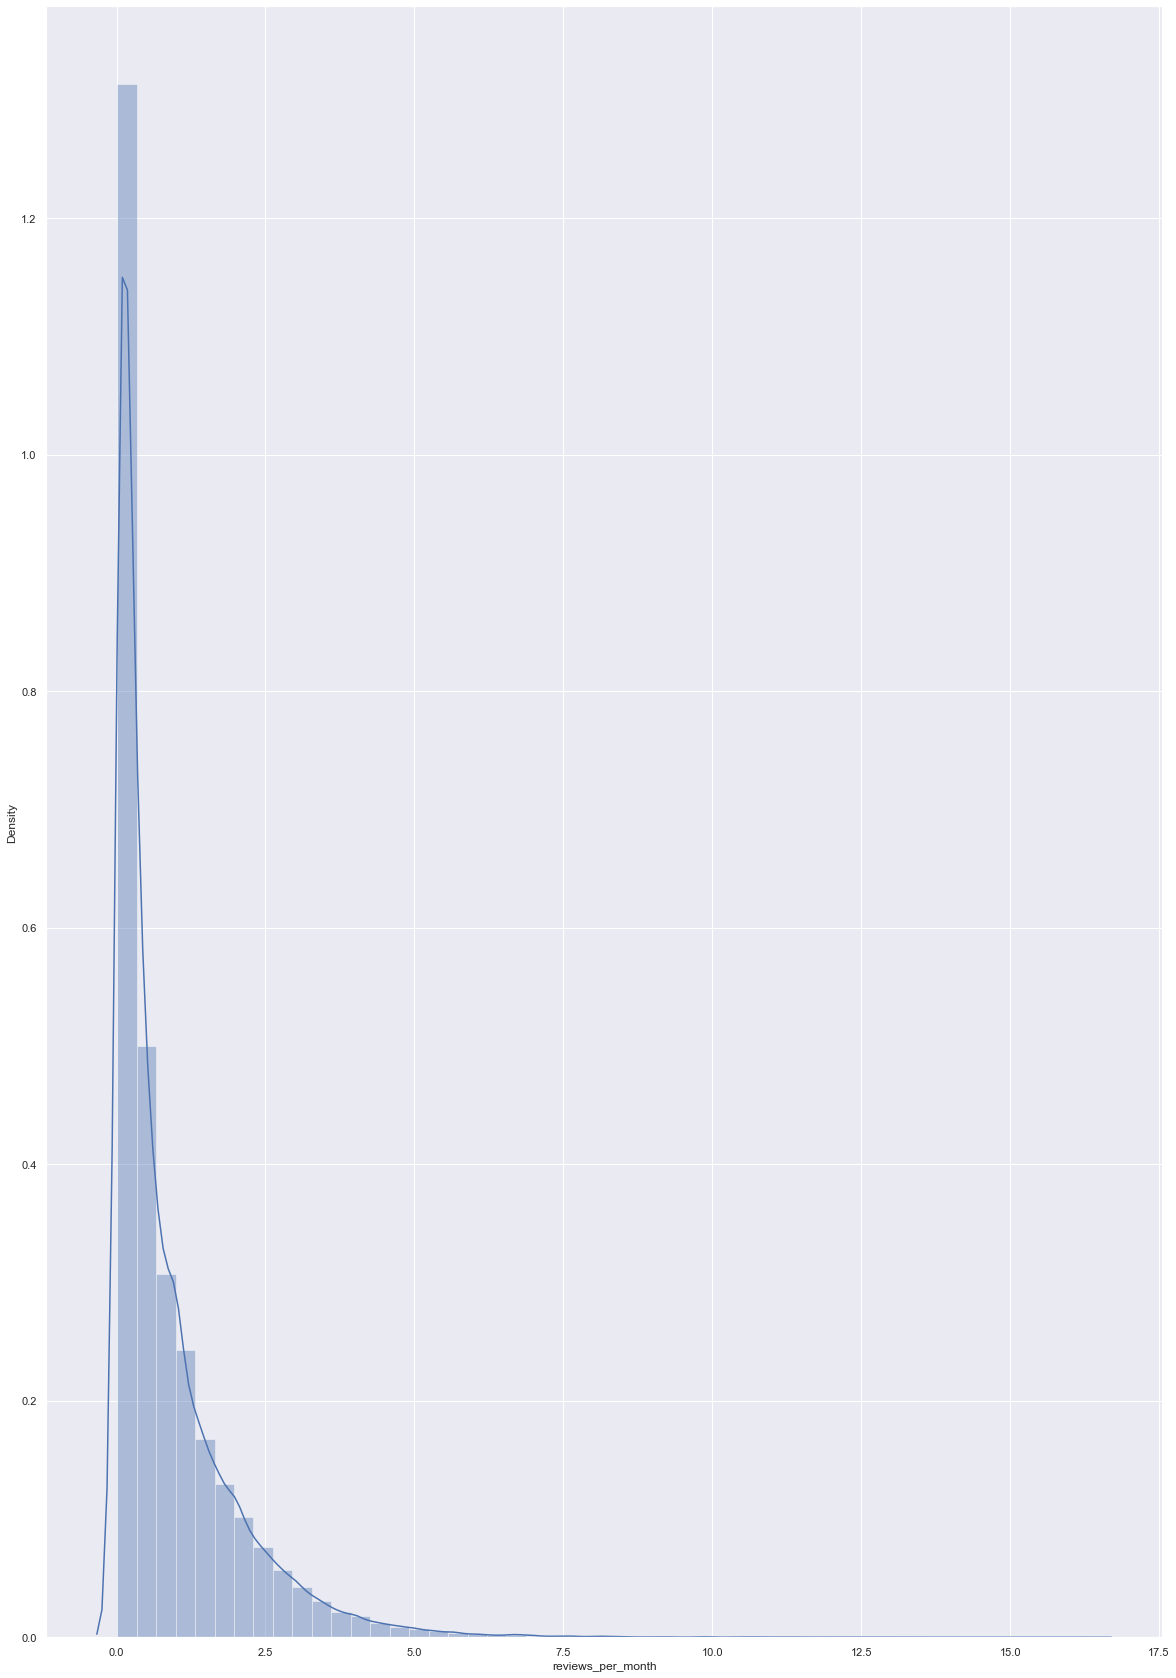

In [26]:
sns.distplot(new_df['reviews_per_month'])
plt.show()

C:\Users\malak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='reviews_per_month'>

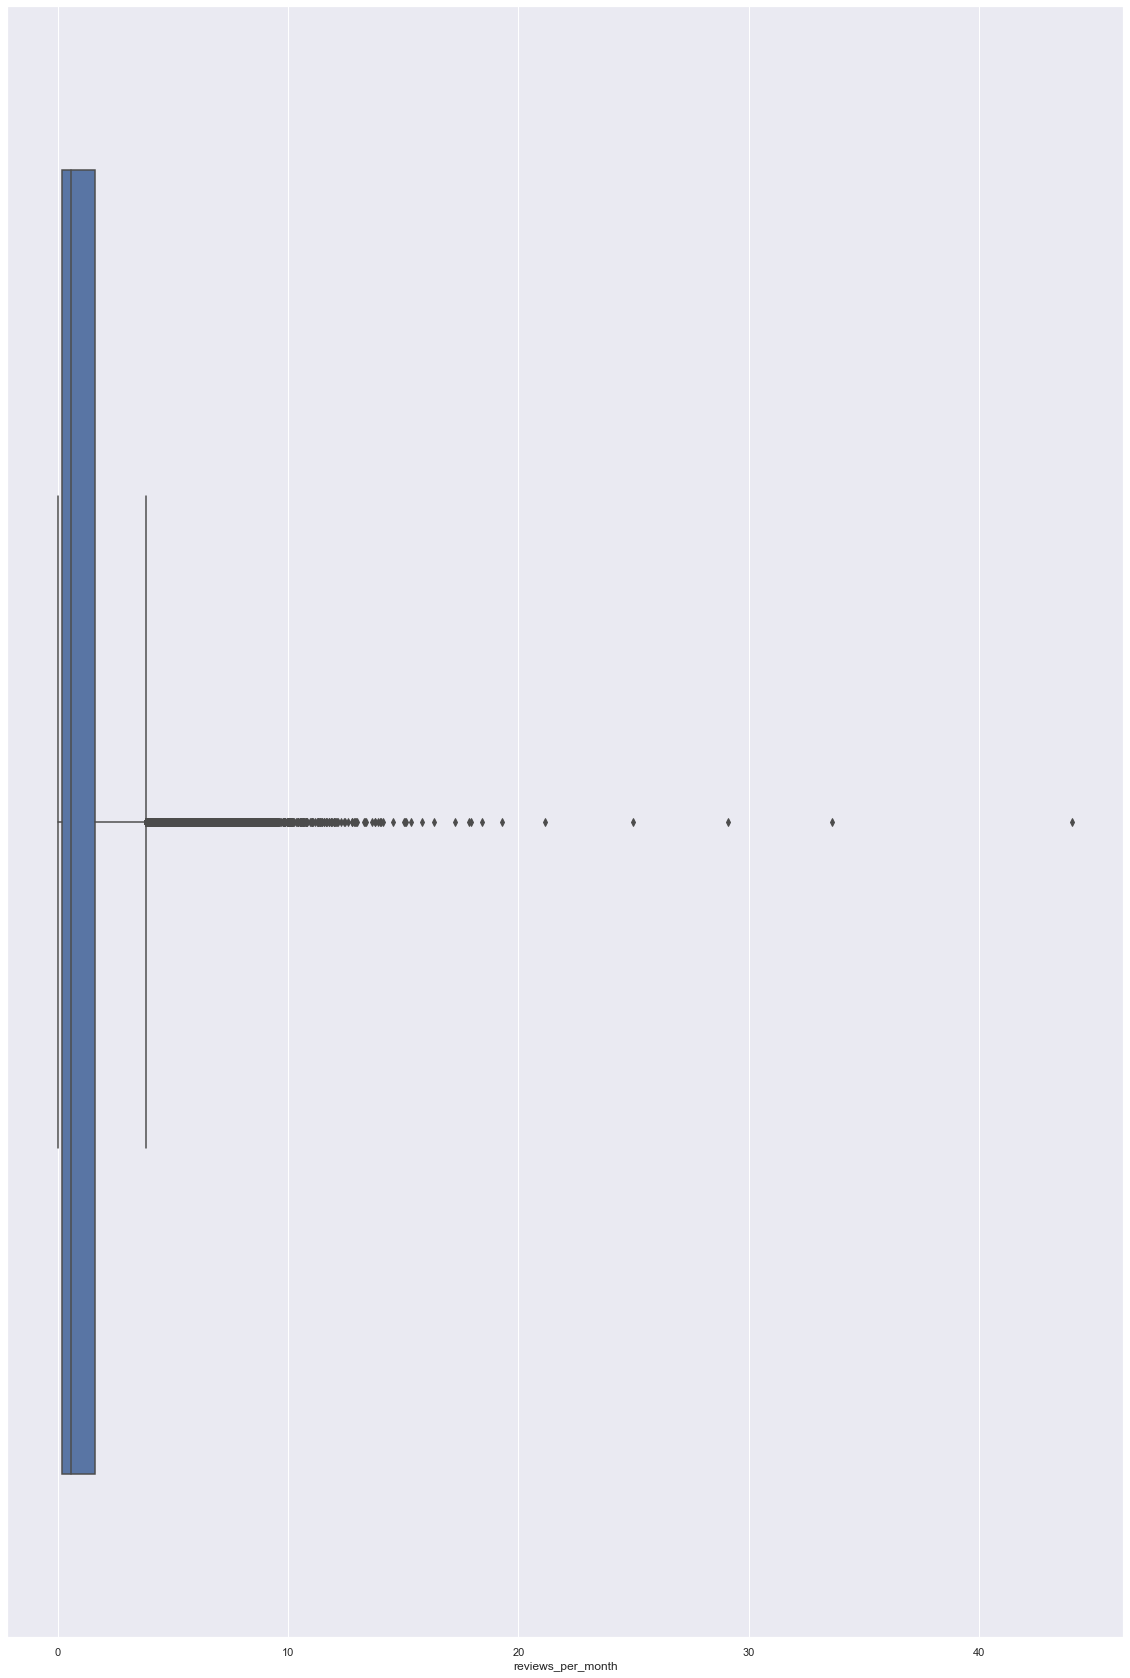

In [27]:
sns.boxplot(df_new['reviews_per_month'])

In [28]:
p25 = new_df['reviews_per_month'].quantile(0.25)
p75 = new_df['reviews_per_month'].quantile(0.75)
p25, p75

(0.15, 1.2)

In [29]:
iqr_2 = p75-p25
iqr_2

1.05

In [30]:
upper_2 = p75 + 1.5 * iqr_2
lower_2 = p25 - 1.5 * iqr_2
lower_2, upper_2

(-1.4250000000000003, 2.7750000000000004)

In [31]:
new_df = new_df[new_df['reviews_per_month'] < upper_2]
new_df.shape

(71368, 17)

C:\Users\malak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


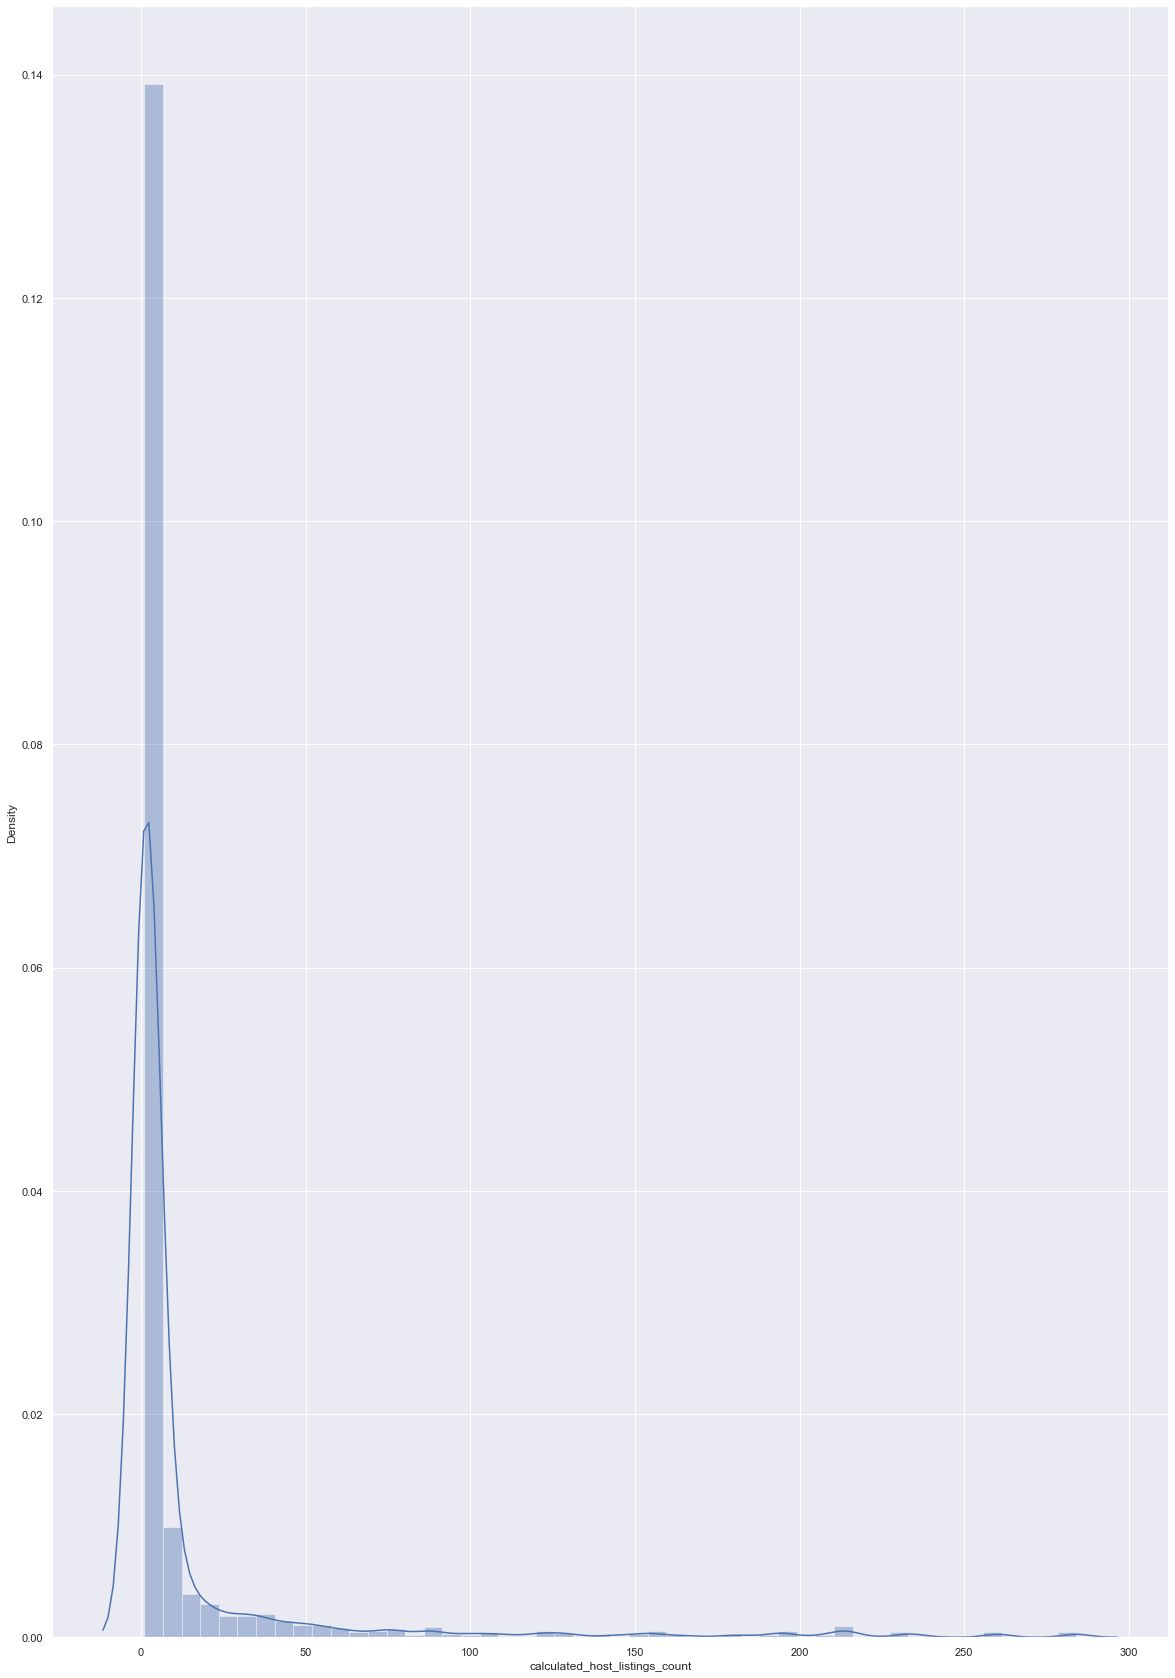

In [32]:
sns.distplot(new_df['calculated_host_listings_count'])
plt.show()

C:\Users\malak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='calculated_host_listings_count'>

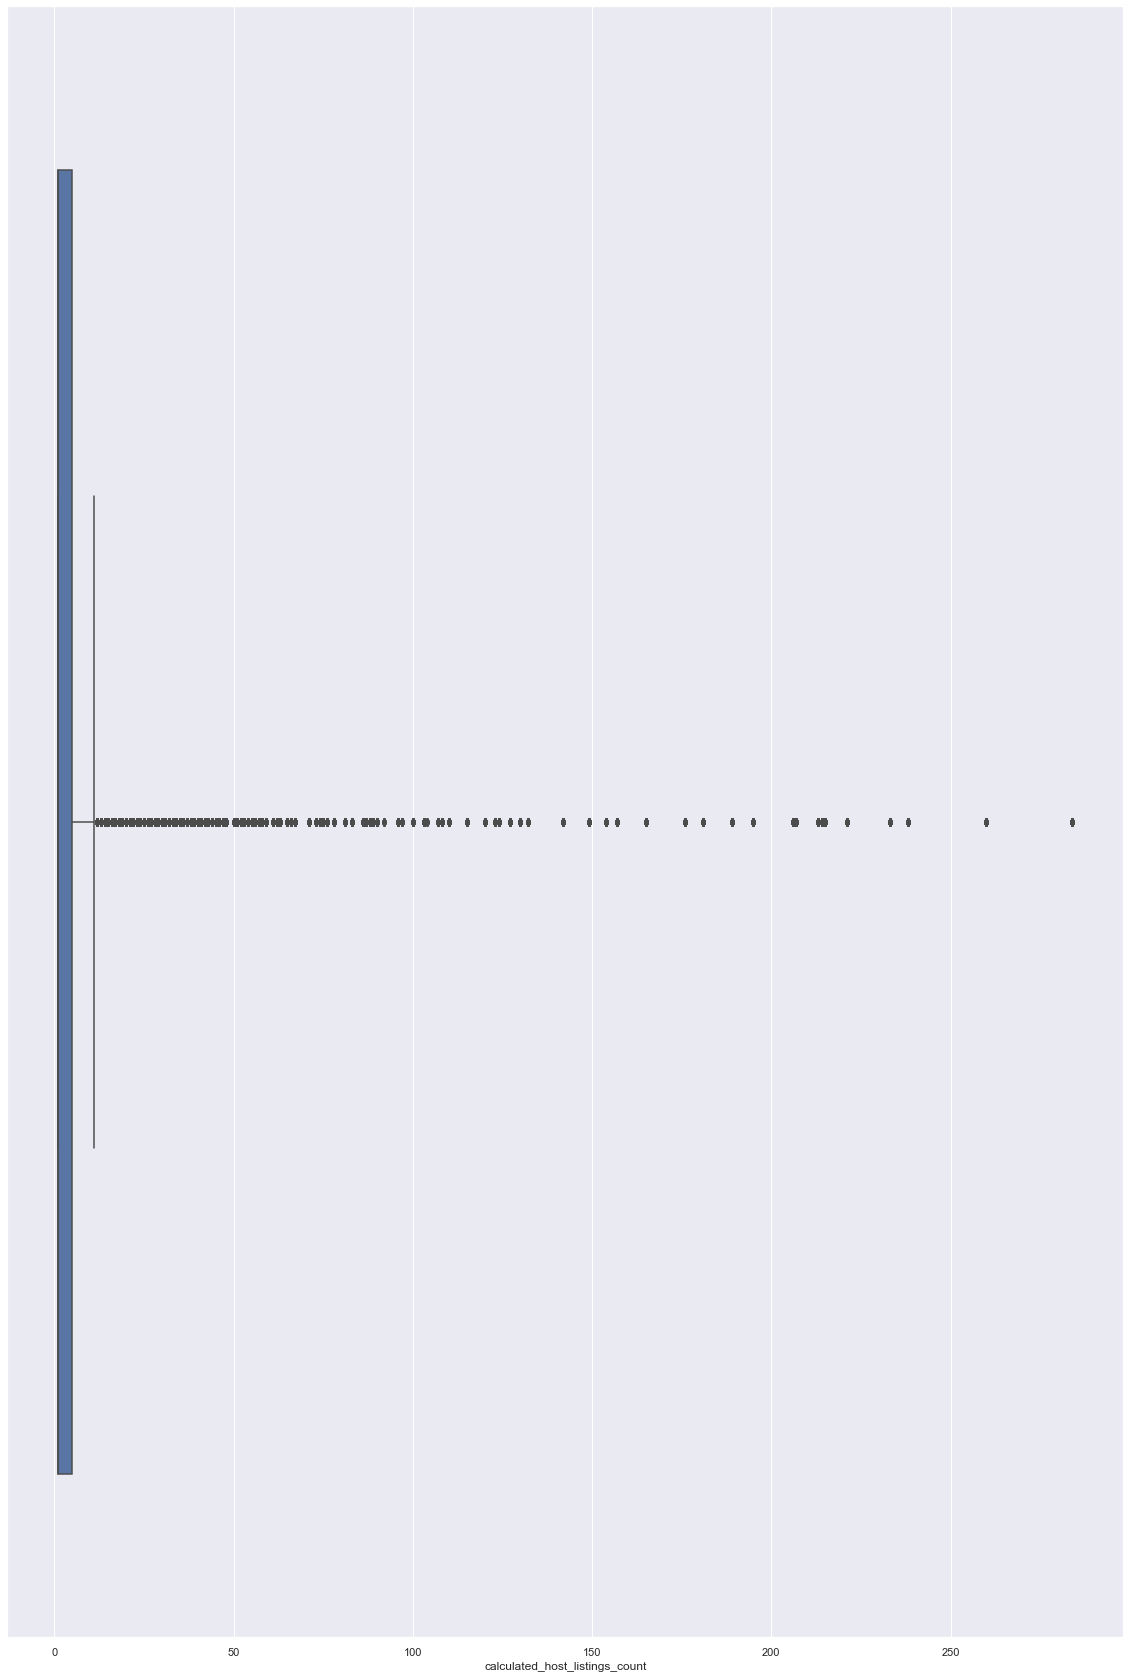

In [33]:
sns.boxplot(new_df['calculated_host_listings_count'])

In [34]:
percentile25 = new_df['calculated_host_listings_count'].quantile(0.25)
percentile75 = new_df['calculated_host_listings_count'].quantile(0.75)
percentile25, percentile75

(1.0, 5.0)

In [35]:
host_iqr = percentile75 - percentile25
host_iqr

4.0

In [36]:
host_upper = percentile75 + 1.5 * iqr
host_upper

66.875

In [37]:
new_df = new_df[new_df['calculated_host_listings_count'] < host_upper]
new_df.shape

(67260, 17)

C:\Users\malak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


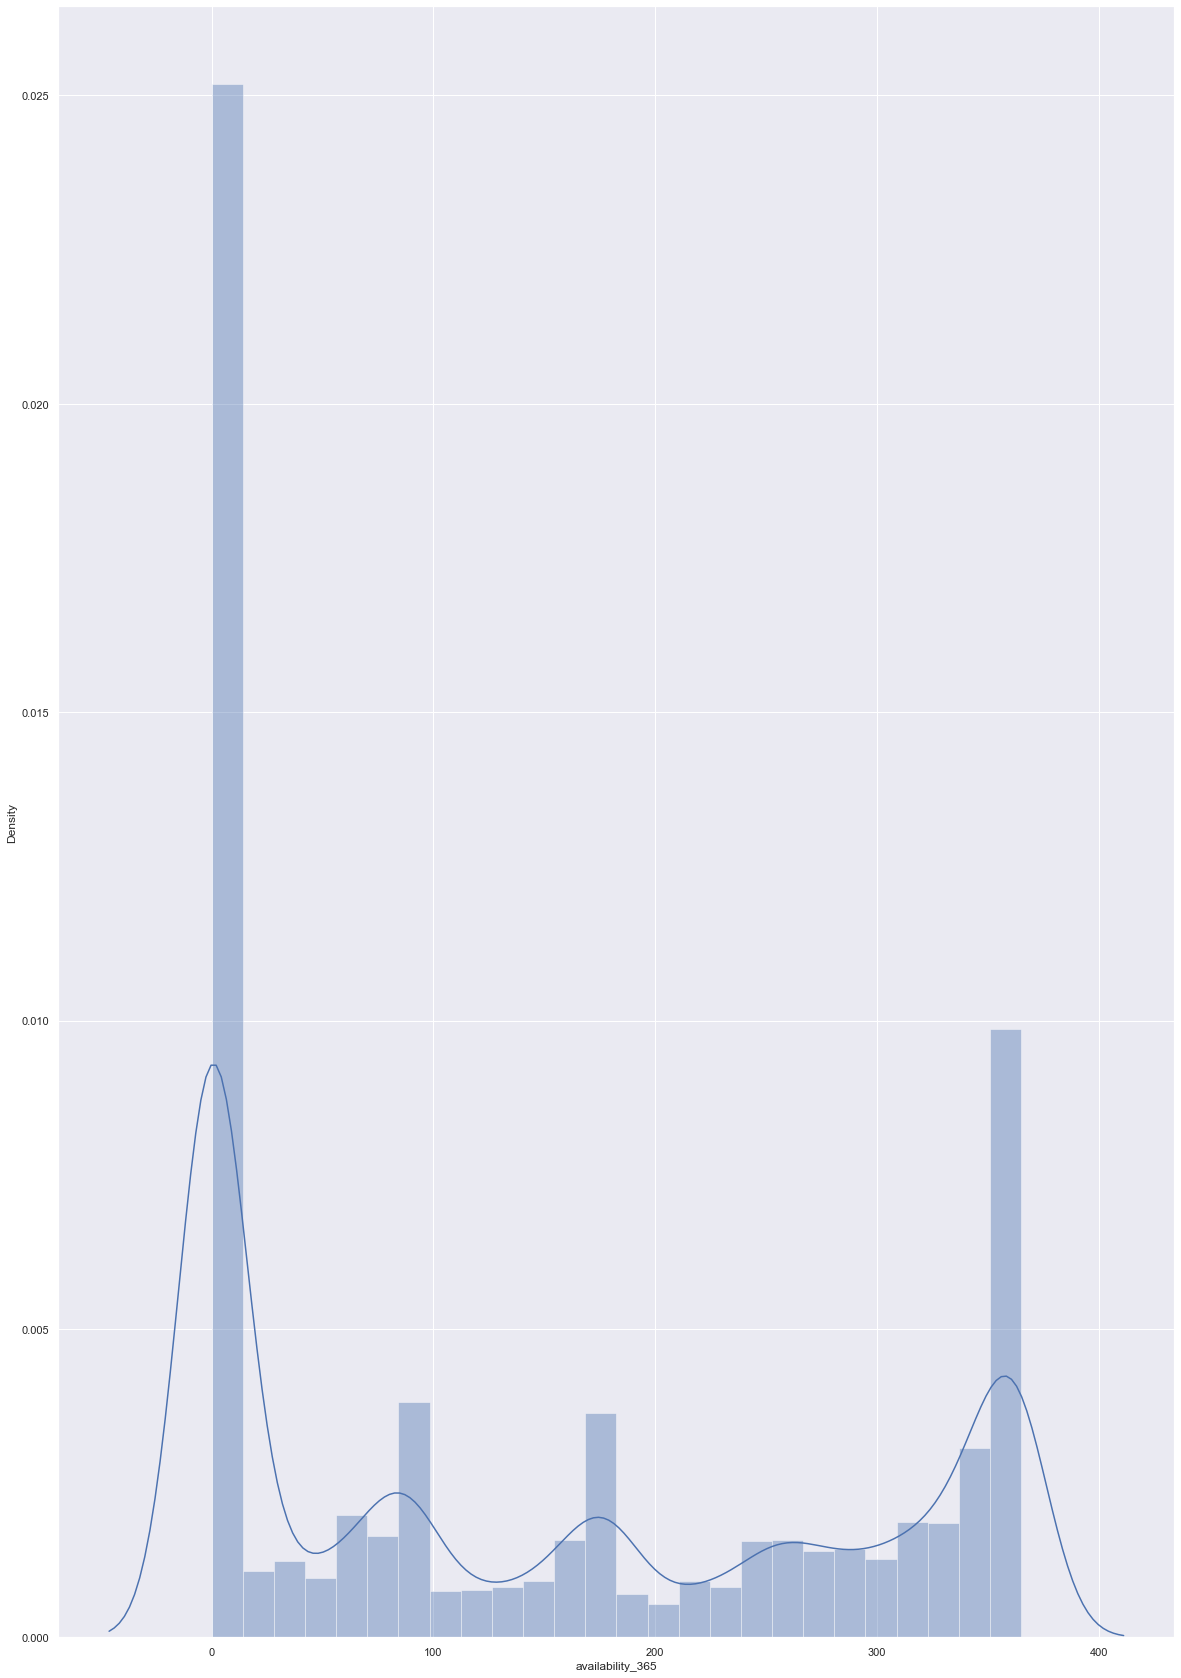

In [38]:
sns.distplot(new_df['availability_365'])
plt.show()

C:\Users\malak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='availability_365'>

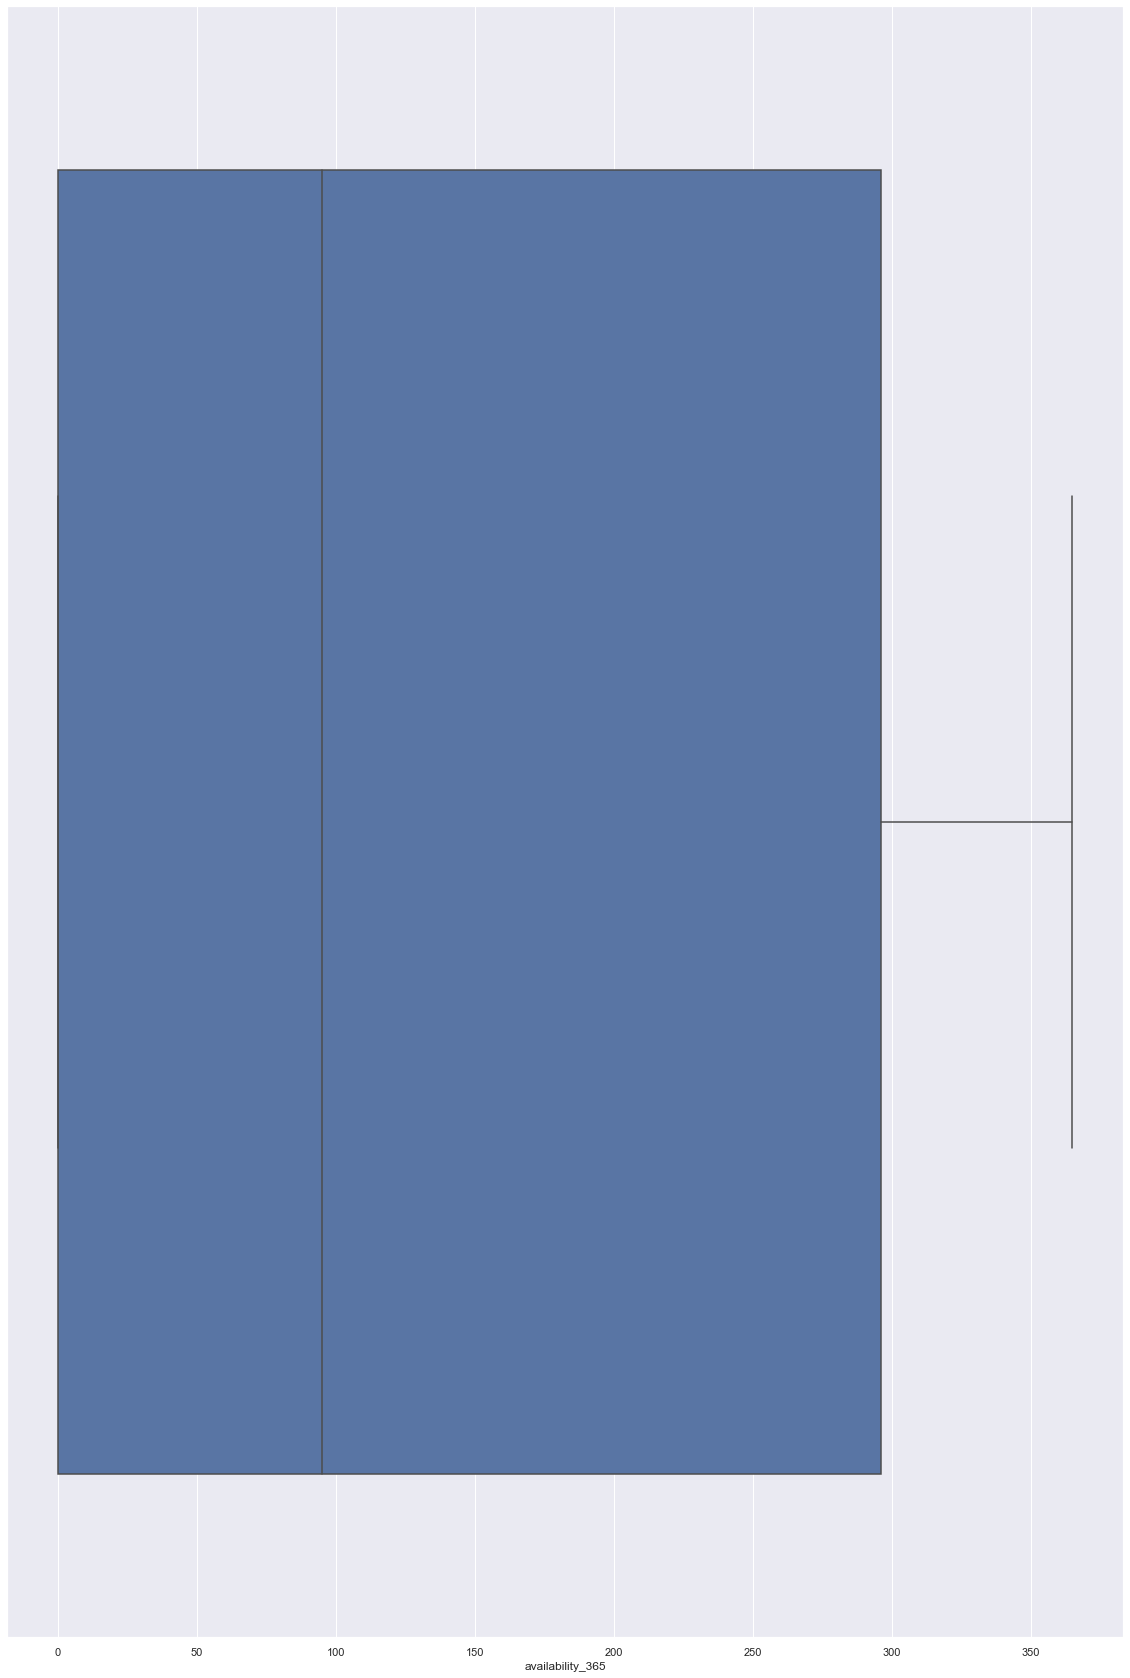

In [39]:
sns.boxplot(new_df['availability_365'])

In [40]:
availability_upper = new_df['availability_365'].quantile(0.99)
availability_upper

365.0

In [41]:
new_df = new_df[new_df['availability_365'] < availability_upper]
new_df.shape

(63444, 17)

C:\Users\malak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

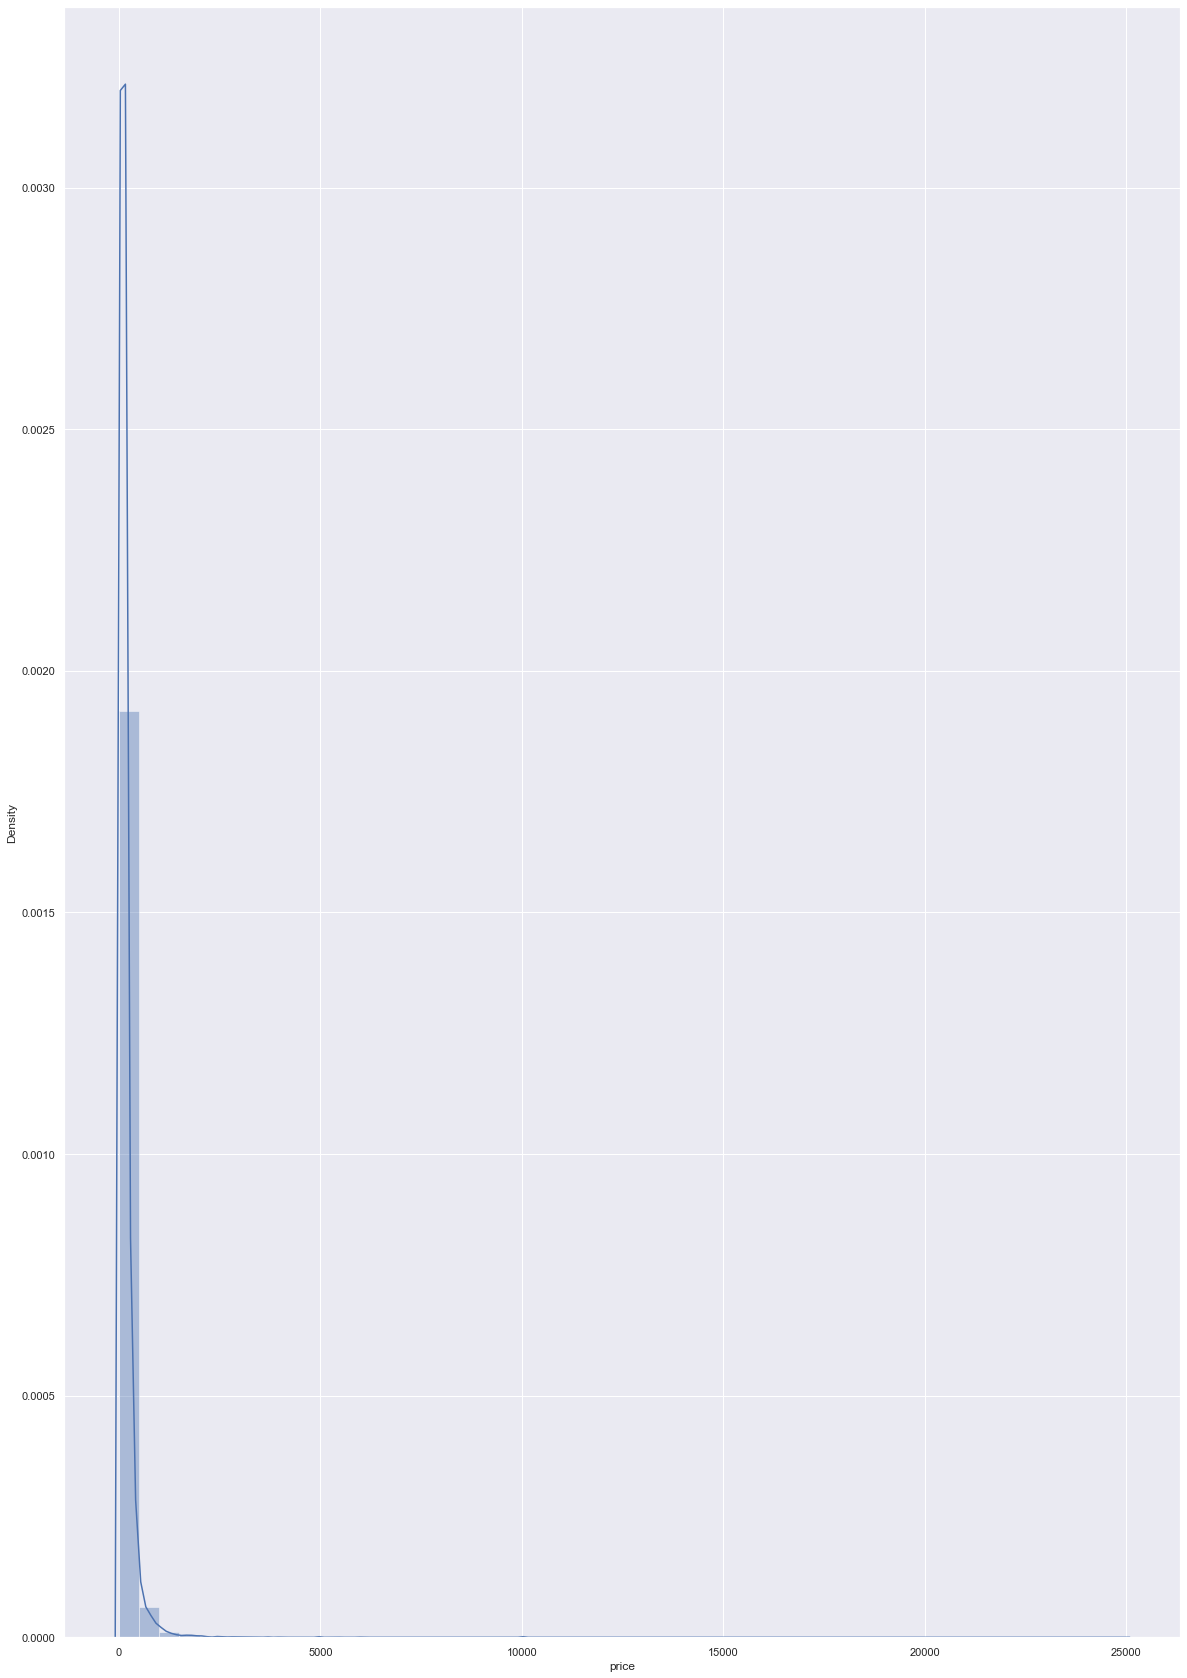

In [42]:
sns.distplot(df['price'])

In [43]:
price_upper = new_df['price'].mean() + 3*new_df['price'].std()
price_upper

1027.3541275377045

In [44]:
new_df = new_df[new_df['price'] < price_upper]
new_df.shape

(62808, 17)

In [45]:
new_df.to_csv('Trimmed Data.csv')